In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import numpy as np
from sklearn.metrics import mean_squared_error, explained_variance_score
import math
#from sklearn.externals import joblib
import os


#Label Encoding
from sklearn import preprocessing


pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv(r'F:\Kabir\CSUN\Comp542\rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,16-12-2018 9.30,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,27-11-2018 2.00,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,28-11-2018 1.00,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,30-11-2018 4.53,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,29-11-2018 3.49,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Number of empty columns

print(df.isnull().sum())

#Number of total values in columns
print(df.count())


id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [4]:
# Drop empty data - deleting blank price rows from df
df = df.dropna()

In [6]:
#Number of total values in columns
print(df.count())

#Printing data type
df.info()

id                             637976
timestamp                      637976
hour                           637976
day                            637976
month                          637976
datetime                       637976
timezone                       637976
source                         637976
destination                    637976
cab_type                       637976
product_id                     637976
name                           637976
price                          637976
distance                       637976
surge_multiplier               637976
latitude                       637976
longitude                      637976
temperature                    637976
apparentTemperature            637976
short_summary                  637976
long_summary                   637976
precipIntensity                637976
precipProbability              637976
humidity                       637976
windSpeed                      637976
windGust                       637976
windGustTime

In [12]:
#Finding integer and Float type data from our df

numeric_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()
numeric_columns

['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [33]:
#Printing length since list is too big to see correlation in heatmap
print(len(numeric_columns))
numeric_columns = list(numeric_columns)
#breaking into 4 lists
numeric_columns_1 = numeric_columns[:12]
numeric_columns_2 = numeric_columns[12:24]
numeric_columns_3 = numeric_columns[24:36]
numeric_columns_4 = numeric_columns[36:]

# Appending price to list

numeric_columns_1.append('price')
numeric_columns_2.append('price')
numeric_columns_3.append('price')
numeric_columns_4.append('price')

# Removing duplicate price values in list

numeric_columns_1 = list(set(numeric_columns_1))
numeric_columns_2 = list(set(numeric_columns_2))
numeric_columns_3 = list(set(numeric_columns_3))
numeric_columns_4 = list(set(numeric_columns_4))


46


<Axes: >

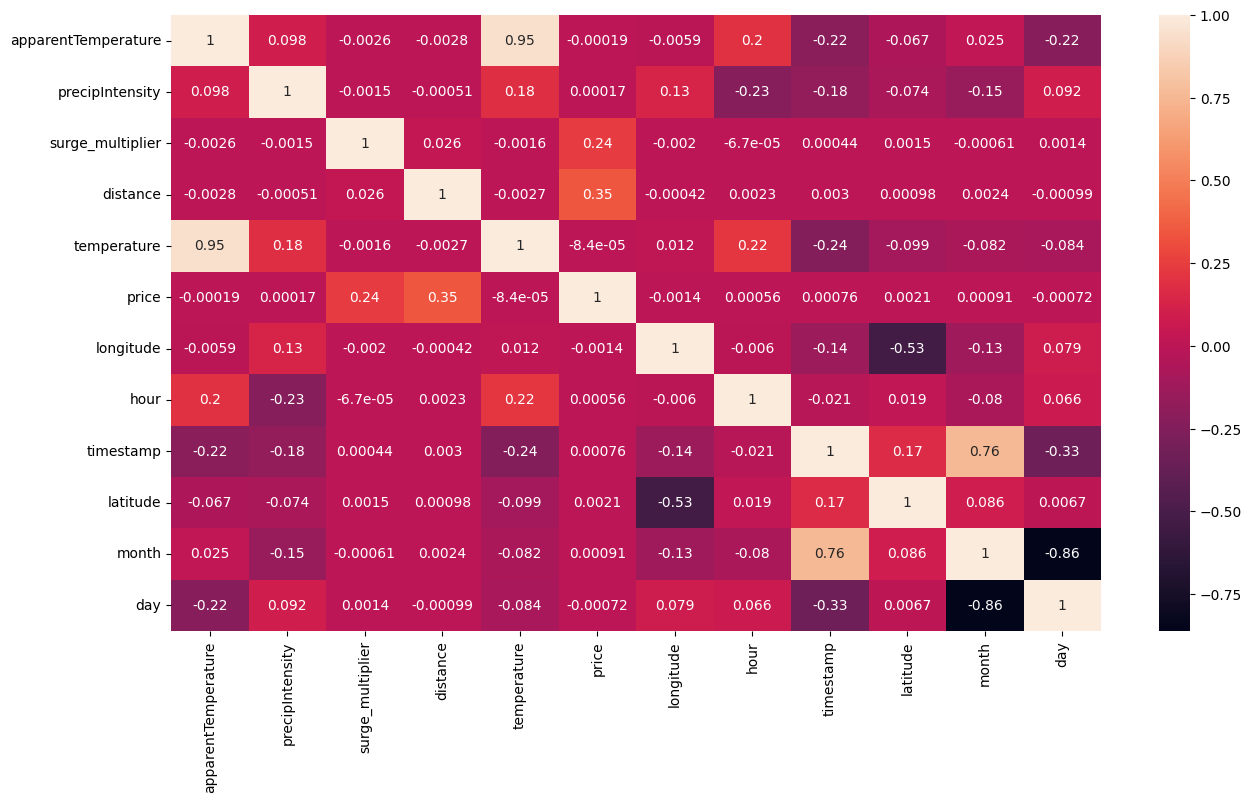

In [28]:
#Finding correlation for numeric data
#list 1
corr = df[numeric_columns_1].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)

<Axes: >

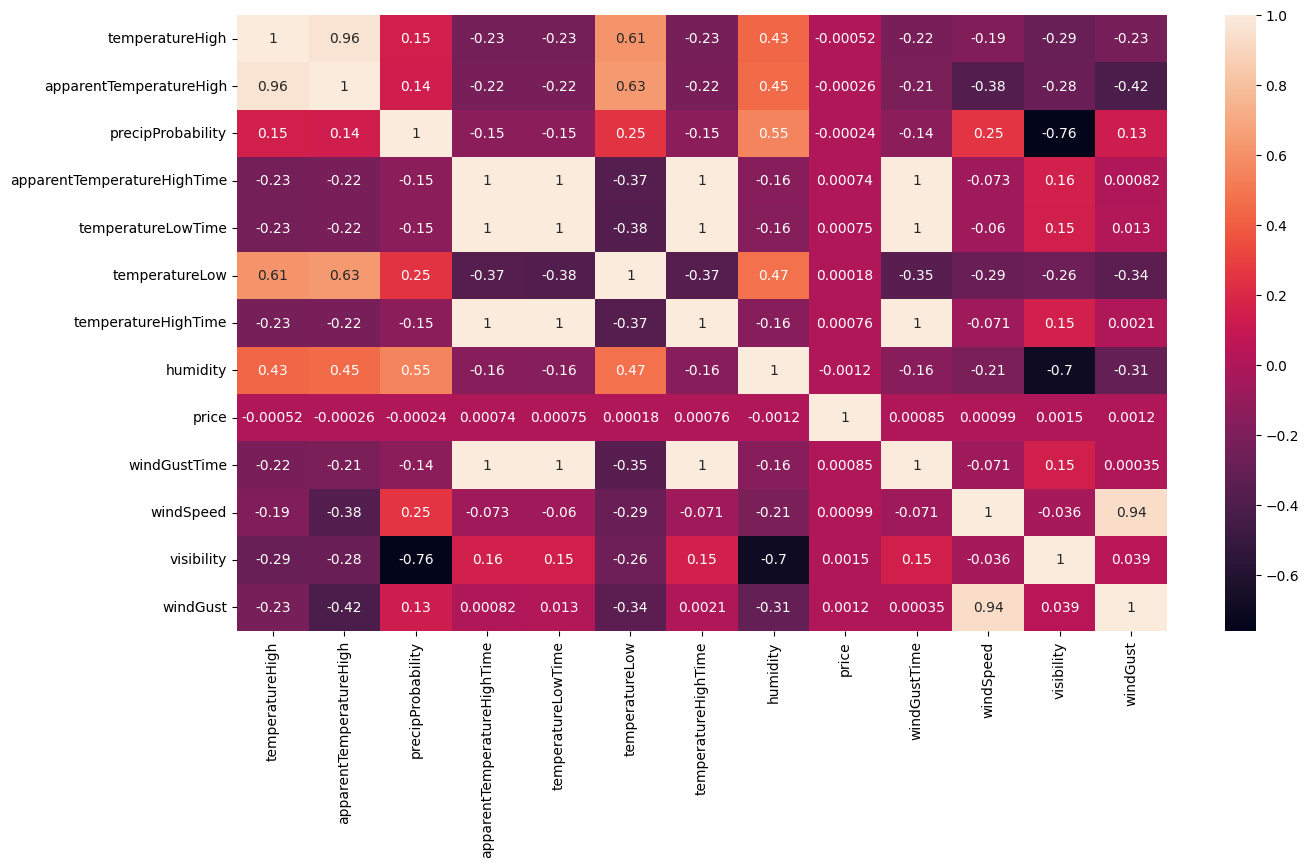

In [30]:
#Finding correlation for numeric data
#list 1
corr = df[numeric_columns_2].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)

<Axes: >

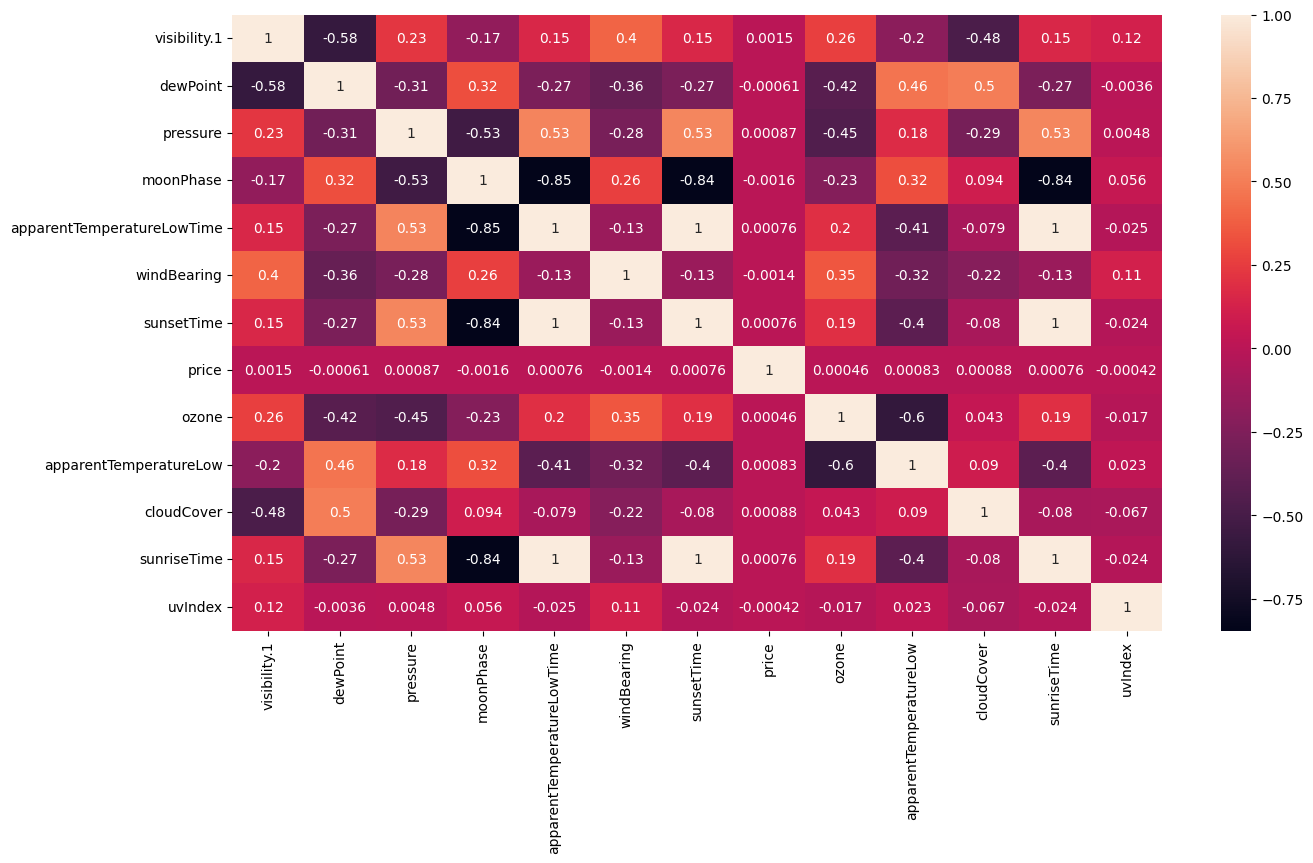

In [31]:
#Finding correlation for numeric data
#list 1
corr = df[numeric_columns_3].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)

<Axes: >

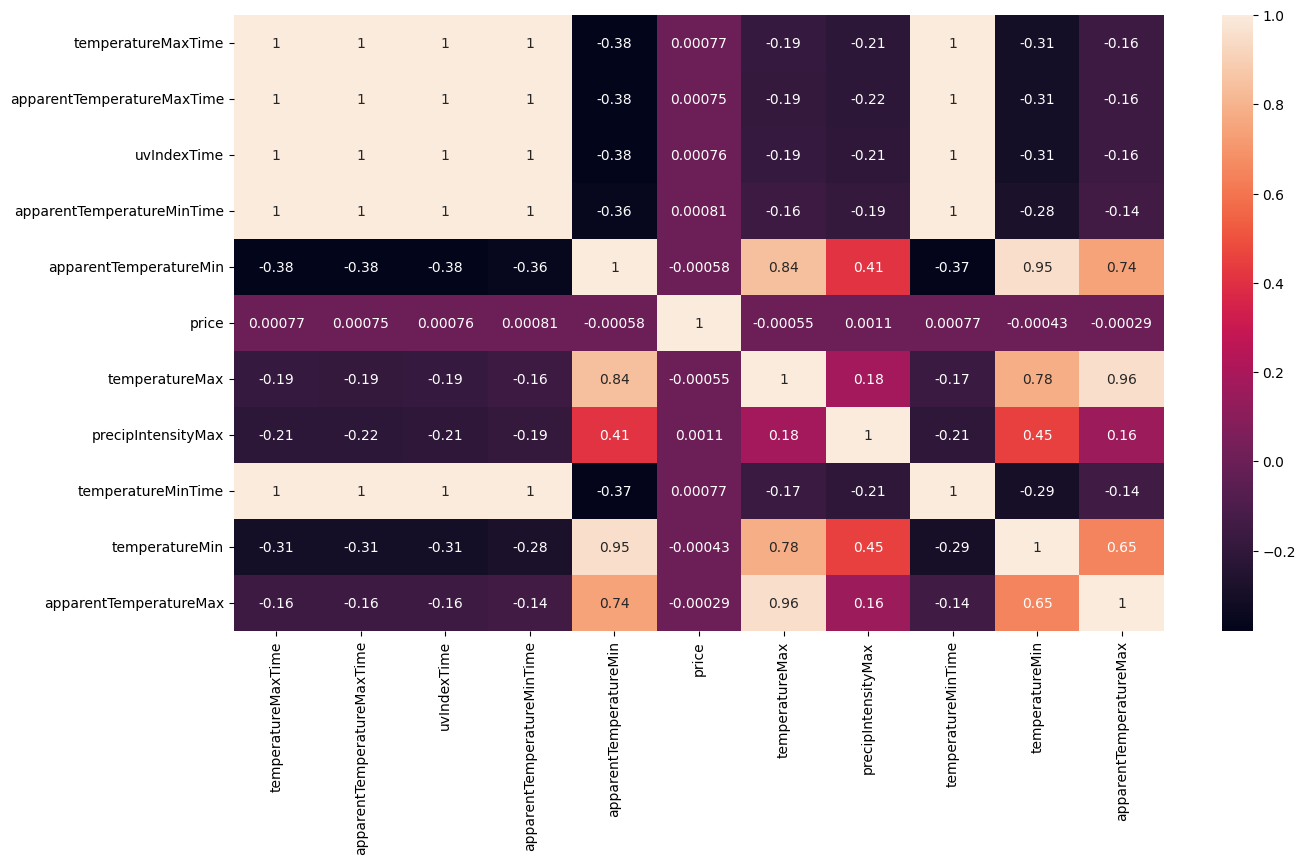

In [32]:
#Finding correlation for numeric data
#list 1
corr = df[numeric_columns_4].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)

In [37]:
# Based on Correlation matrix, we are retaining the following features:
# surge_multiplier, distance, latitude, longitude, humidity, visibility, visibility1, moonphase, windbearing, precipIntensityMax 
#only for numerical fields.

# deleting rest of the columns.

print(numeric_columns)
numeric_columns_to_retain = ['price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'humidity', 'visibility', 'windBearing', 'visibility.1', 'moonPhase', 'precipIntensityMax']

numeric_columnns_to_delete = [i for i in numeric_columns if i not in numeric_columns_to_retain]
print(len(numeric_columnns_to_delete), numeric_columnns_to_delete)

#Checking if visibility and visibility.1 are same or not.

if df['visibility'].equals(df['visibility.1']):
    numeric_columnns_to_delete.append('visibility.1')

print(len(numeric_columnns_to_delete), numeric_columnns_to_delete)

['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
35 ['timestamp', 'hour', 'day', 'month', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'windSpeed', 'windGust', 'windGustTime', 'temperatureHigh', 'temperatureHigh

In [38]:
# Deleting unwanted columns
df = df.drop(numeric_columnns_to_delete, axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  637976 non-null  object 
 1   datetime            637976 non-null  object 
 2   timezone            637976 non-null  object 
 3   source              637976 non-null  object 
 4   destination         637976 non-null  object 
 5   cab_type            637976 non-null  object 
 6   product_id          637976 non-null  object 
 7   name                637976 non-null  object 
 8   price               637976 non-null  float64
 9   distance            637976 non-null  float64
 10  surge_multiplier    637976 non-null  float64
 11  latitude            637976 non-null  float64
 12  longitude           637976 non-null  float64
 13  short_summary       637976 non-null  object 
 14  long_summary        637976 non-null  object 
 15  humidity            637976 non-null  fl

In [39]:
df.head()

,id,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary,humidity,visibility,icon,windBearing,moonPhase,precipIntensityMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,16-12-2018 9.30,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,Rain throughout the day.,0.68,10.000,partly-cloudy-night,57,0.30,0.1276
1,4bd23055-6827-41c6-b23b-3c491f24e74d,27-11-2018 2.00,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,"Rain until morning, starting again in the eve...",0.94,4.786,rain,90,0.64,0.1300
2,981a3613-77af-4620-a42a-0c0866077d1e,28-11-2018 1.00,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,Light rain in the morning.,0.75,10.000,clear-night,240,0.68,0.1064
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,30-11-2018 4.53,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear,Partly cloudy throughout the day.,0.73,10.000,clear-night,310,0.75,0.0000
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,29-11-2018 3.49,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy,Mostly cloudy throughout the day.,0.70,10.000,partly-cloudy-night,303,0.72,0.0001


In [42]:
#Converting date time to time object

#Converting Date to Date Object

def return_date_object(date):
    datetime_object = datetime.strptime(date, '%d-%m-%Y %H.%M')
    return datetime_object

df['datetime'] = df['datetime'].apply(return_date_object)

In [46]:
#Printing unique data in categorical columns

# Checking categorical data

category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain '

In [44]:
#Removing _id and Timezone since those values are not relevant (id is for tracking, timezone only has one value)

df = df.drop(['id', 'timezone'], axis = 1)
df.info()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   datetime            637976 non-null  datetime64[ns]
 1   source              637976 non-null  object        
 2   destination         637976 non-null  object        
 3   cab_type            637976 non-null  object        
 4   product_id          637976 non-null  object        
 5   name                637976 non-null  object        
 6   price               637976 non-null  float64       
 7   distance            637976 non-null  float64       
 8   surge_multiplier    637976 non-null  float64       
 9   latitude            637976 non-null  float64       
 10  longitude           637976 non-null  float64       
 11  short_summary       637976 non-null  object        
 12  long_summary        637976 non-null  object        
 13  humidity            637976 non-nul

# Preprocessing Categorical Data

In [47]:
# Picking up categorical features

new_cat = ['price','source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','long_summary', 'product_id']

#Label Encoding

le = preprocessing.LabelEncoder()

label_dict = {}


for col in df.select_dtypes(include='O').columns:
    df[col]=le.fit_transform(df[col])

    label_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    

In [48]:
df.head()

,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary,humidity,visibility,icon,windBearing,moonPhase,precipIntensityMax
0,2018-12-16 09:30:00,5,7,0,7,7,5.0,0.44,1.0,42.2148,-71.033,4,9,0.68,10.000,5,57,0.30,0.1276
1,2018-11-27 02:00:00,5,7,0,11,2,11.0,0.44,1.0,42.2148,-71.033,8,10,0.94,4.786,6,90,0.64,0.1300
2,2018-11-28 01:00:00,5,7,0,6,5,7.0,0.44,1.0,42.2148,-71.033,0,2,0.75,10.000,1,240,0.68,0.1064
3,2018-11-30 04:53:00,5,7,0,9,4,26.0,0.44,1.0,42.2148,-71.033,0,6,0.73,10.000,1,310,0.75,0.0000
4,2018-11-29 03:49:00,5,7,0,10,6,9.0,0.44,1.0,42.2148,-71.033,6,4,0.70,10.000,5,303,0.72,0.0001


In [49]:
#Printing mappings of encoded data

print(label_dict)

{'source': {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3, 'Financial District': 4, 'Haymarket Square': 5, 'North End': 6, 'North Station': 7, 'Northeastern University': 8, 'South Station': 9, 'Theatre District': 10, 'West End': 11}, 'destination': {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3, 'Financial District': 4, 'Haymarket Square': 5, 'North End': 6, 'North Station': 7, 'Northeastern University': 8, 'South Station': 9, 'Theatre District': 10, 'West End': 11}, 'cab_type': {'Lyft': 0, 'Uber': 1}, 'product_id': {'55c66225-fbe7-4fd5-9072-eab1ece5e23e': 0, '6c84fd89-3f11-4782-9b50-97c468b19529': 1, '6d318bcc-22a3-4af6-bddd-b409bfce1546': 2, '6f72dfc5-27f1-42e8-84db-ccc7a75f6969': 3, '997acbb5-e102-41e1-b155-9df7de0a73f2': 4, '9a0e7b09-b92b-4c41-9779-2ad22b4d779d': 5, 'lyft': 6, 'lyft_line': 7, 'lyft_lux': 8, 'lyft_luxsuv': 9, 'lyft_plus': 10, 'lyft_premier': 11}, 'name': {'Black': 0, 'Black SUV': 1, 'Lux': 2, 'Lux Black': 3, 'Lux Black X

<Axes: >

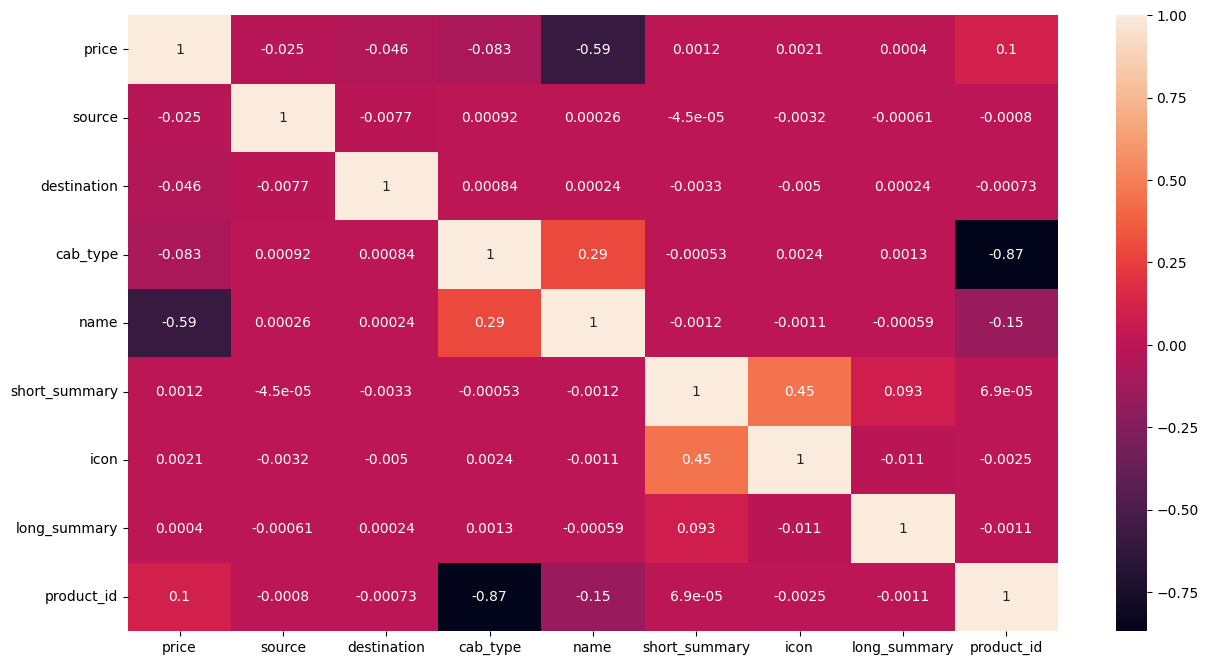

In [50]:
# Checking the correlation for labeled categorical data

plt.figure(figsize=(15,8))
sns.heatmap(df[new_cat].corr(),annot=True)

In [51]:
#Based on our observation, we are removing 
#the long summary and the short summary columns 
#since icon is providing a higher correlation and all 3 are similar fields.

df = df.drop(['short_summary', 'long_summary'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   datetime            637976 non-null  datetime64[ns]
 1   source              637976 non-null  int32         
 2   destination         637976 non-null  int32         
 3   cab_type            637976 non-null  int32         
 4   product_id          637976 non-null  int32         
 5   name                637976 non-null  int32         
 6   price               637976 non-null  float64       
 7   distance            637976 non-null  float64       
 8   surge_multiplier    637976 non-null  float64       
 9   latitude            637976 non-null  float64       
 10  longitude           637976 non-null  float64       
 11  humidity            637976 non-null  float64       
 12  visibility          637976 non-null  float64       
 13  icon                637976 non-nul

<Axes: >

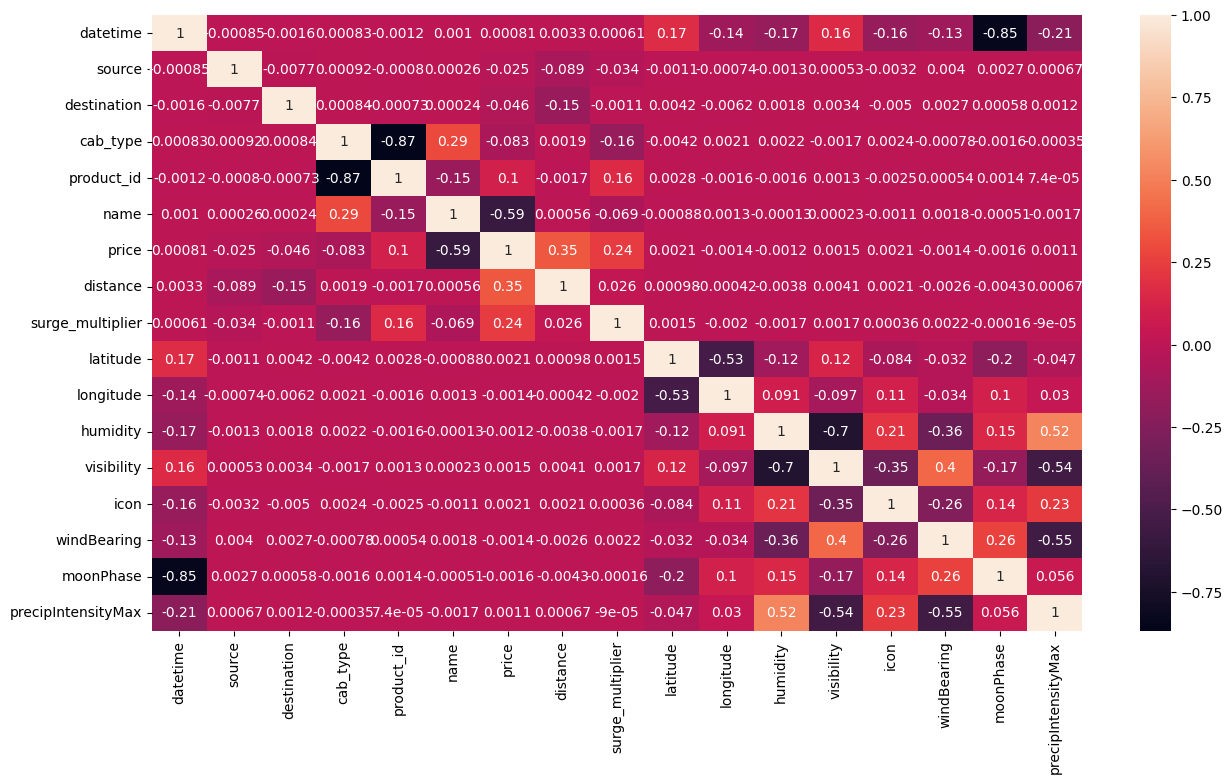

In [52]:
# Checking the correlation for labeled categorical data

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [53]:
#Removing latitude, longitude and Datetime since DT has a weak correlation, 
# while lat and long have no derived relation with the pricing unless destination data is also present.

df = df.drop(['latitude', 'longitude', 'datetime'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   source              637976 non-null  int32  
 1   destination         637976 non-null  int32  
 2   cab_type            637976 non-null  int32  
 3   product_id          637976 non-null  int32  
 4   name                637976 non-null  int32  
 5   price               637976 non-null  float64
 6   distance            637976 non-null  float64
 7   surge_multiplier    637976 non-null  float64
 8   humidity            637976 non-null  float64
 9   visibility          637976 non-null  float64
 10  icon                637976 non-null  int32  
 11  windBearing         637976 non-null  int64  
 12  moonPhase           637976 non-null  float64
 13  precipIntensityMax  637976 non-null  float64
dtypes: float64(7), int32(6), int64(1)
memory usage: 58.4 MB


In [57]:
#Removing Outliers from price

def check_outliers(df):
    min_ = min(df['price'])
    max_ = max(df['price'])
    print("Min : ", min_, "\n", "Max : ", max_)
    
    q1 = df['price'].quantile(0.25)
    q3 = df['price'].quantile(0.75)
    IQR = q3-q1
    
    print(q1, q3, IQR)
    print("UPPER BOUND = ", q3 + 1.5*IQR)
    print("LOWER BOUND = ", q1 - 1.5*IQR)
    
    lower_bound= q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    
    return lower_bound, upper_bound

check_outliers(df)

Min :  2.5 
 Max :  97.5
9.0 22.5 13.5
UPPER BOUND =  42.75
LOWER BOUND =  -11.25


(-11.25, 42.75)

In [58]:
#Dropping outliewr values

lower_bound, upper_bound = check_outliers(df)
df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

df.info()

Min :  2.5 
 Max :  97.5
9.0 22.5 13.5
UPPER BOUND =  42.75
LOWER BOUND =  -11.25
<class 'pandas.core.frame.DataFrame'>
Index: 632387 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   source              632387 non-null  int32  
 1   destination         632387 non-null  int32  
 2   cab_type            632387 non-null  int32  
 3   product_id          632387 non-null  int32  
 4   name                632387 non-null  int32  
 5   price               632387 non-null  float64
 6   distance            632387 non-null  float64
 7   surge_multiplier    632387 non-null  float64
 8   humidity            632387 non-null  float64
 9   visibility          632387 non-null  float64
 10  icon                632387 non-null  int32  
 11  windBearing         632387 non-null  int64  
 12  moonPhase           632387 non-null  float64
 13  precipIntensityMax  632387 non-null  float64
dtypes: floa

In [82]:
#Dumping preprocessed data file that can be used by next set of scripts.
try:
    def recur(mydict):
        for k, v in mydict.items():
            if isinstance(v, dict):
                recur(v)
            elif isinstance(v, np.int32) or isinstance(v, np.int64):
                mydict[k] = int(v)
        return mydict
    import json
    with open(r'F:\Kabir\CSUN\Comp542\label_encoding_mappings_team_4.json', 'w', encoding ='utf8') as json_file: 
        json.dump(recur(label_dict), json_file, ensure_ascii = False)
    
except Exception as e:
    print(e)

df.to_csv(r'F:\Kabir\CSUN\Comp542\preprocessed_csv_team_4.csv', index = False)